# <center> Definition of whether a person will survive on TITANIC or not</center>
#  <center>With help of neural networks</center>

In [71]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://avatars.mds.yandex.net/get-zen_doc/1671180/pub_5cc73fff7ae9ed00b3a17587_5cc74092ac1ad900b3c66c97/scale_1200", width=500, height=500)

In [72]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

### <center>Data<center>

In [73]:
data = pd.read_csv("train.csv", index_col='PassengerId')
data.shape
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender (in those good ol' times when there were just 2 of them)
* Age - age in years, if available
* Sibsp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

In [74]:
# table dimensions
print("len(data) = ", len(data))
print("data.shape = ", data.shape)

len(data) =  891
data.shape =  (891, 11)


### Отсутствующие значения.
 Посмотрим повнимательнее на отсутствующие значения в наших данных
 
 1. "Cabin" пропущено **1014** значений, что составляет около **77%** информации. Это большой процент неизвестности, поэтому мы не будем использовать этот параметр
 2. "Age" пропущено **263** значения, около **20%**  всех данных. Неизвестные нам значения заполним с учётом их имени и среднего значения
 3. "Fare" неизвестно одно значение
 4. "Embarked" пропущено **2** значения, это **0.22%**. Заменим модой.

In [75]:
data_miss = data.isnull().sum()
data_miss_table = pd.concat([data_miss], axis = 1)
data_miss_table

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


[0.0, 0.0, 0.0, 0.0, 0.19865319865319866, 0.0, 0.0, 0.0, 0.0, 0.7710437710437711, 0.002244668911335578]


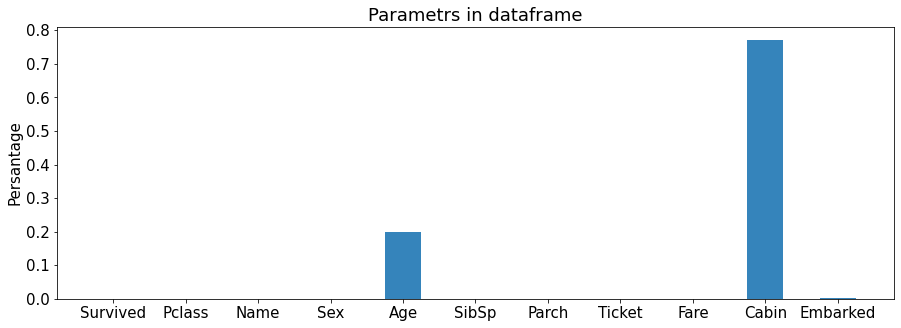

In [76]:
per = []
for i in range(len(data_miss)):
    per.append(data_miss[i]/ len(data))
print(per)
objects = list(data)
y_pos = np.arange(len(objects))
y_pos = y_pos *100
#pd.DataFrame(data.isnull().sum()).plot.bar().set_title("Number of missing values in the given features")


plt.rcParams['figure.figsize'] = [15, 5]
plt.bar(y_pos, per, 50, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Persantage')
plt.title('Parametrs in dataframe')

plt.show()

# Features

### Survived

Более **60%** пассажиров погибло

In [77]:
data.groupby('Survived').size() 

Survived
0    549
1    342
dtype: int64

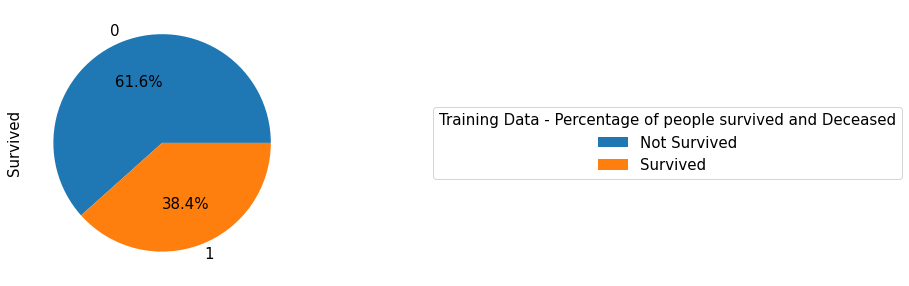

In [78]:
(data.Survived.value_counts(normalize=True) * 100).plot.pie(autopct='%1.1f%%').legend(labels=["Not Survived", "Survived"], loc='center right', bbox_to_anchor=(3.25, 0.5)).set_title("Training Data - Percentage of people survived and Deceased")

### Age

Можно заметить, что большая часть детей в возрасте от 0 до 10 выжила

В любом другом возрасте количество погибших людей было больше, чем тех, кто выжил

Самое большое количество умерших по отшению к выжившим наблюдается в возрастной группе от 20 до 30
Около 140 погибли и только 80 выжии

In [79]:
data.Age.describe()
age_table = pd.concat([data.Age.describe()], axis = 1)
print("Discrintion of Age")
age_table

Discrintion of Age


,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


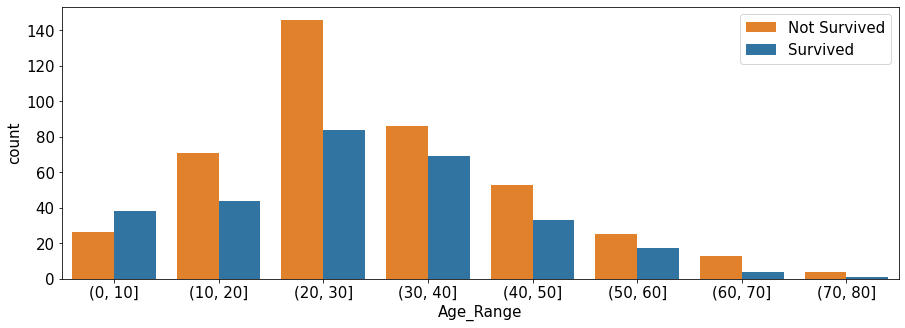

In [80]:
data['Age_Range'] = pd.cut(data.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = data, palette=["C1", "C0"]).legend(labels = ["Not Survived", "Survived"])


#### Заполним пропуски в данных

In [81]:
data['Salutation'] = data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) 
data.Salutation.unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [82]:
grp = data.groupby(['Sex', 'Pclass'])  
data.Age = grp.Age.apply(lambda x: x.fillna(x.median()))
#If still any row remains
data.Age.fillna(data.Age.median, inplace = True)

### Sex

Стоит отметить, что около 60% пассажиров Титаника мужчины

Но как видно из графика выжило около 30% женщин и только 15% процентов мужчин 

In [83]:
data.groupby('Sex').size() / len(data)

Sex
female    0.352413
male      0.647587
dtype: float64

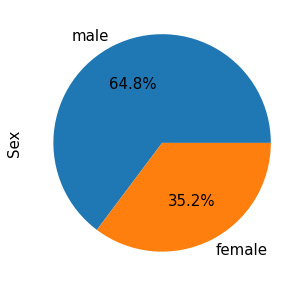

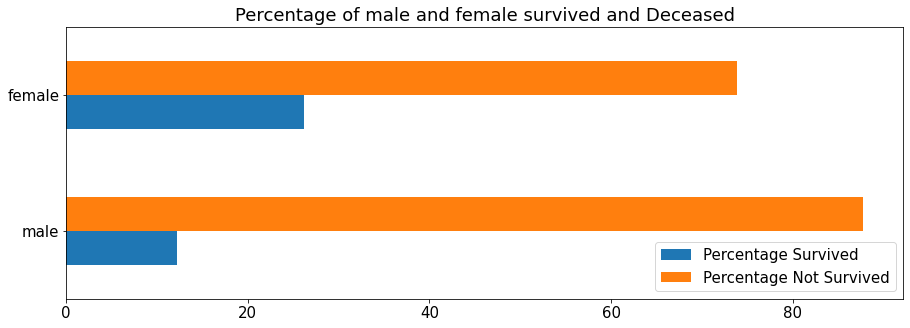

In [84]:
fig_sex = (data.Sex.value_counts(normalize = True) * 100).plot.pie(autopct='%1.1f%%')
male_pr = round((data[data.Sex == 'male'].Survived == 1).value_counts()[1]/len(data.Sex) * 100, 2)
female_pr = round((data[data.Sex == 'female'].Survived == 1).value_counts()[1]/len(data.Sex) * 100, 2)
sex_perc_df = pd.DataFrame(
    { "Percentage Survived":{"male": male_pr,"female": female_pr},  "Percentage Not Survived":{"male": 100-male_pr,"female": 100-female_pr}})
sex_perc_df.plot.barh().set_title("Percentage of male and female survived and Deceased")
fig_sex

In [85]:
data['Sex'] = data['Sex'].replace(['male', 'female'], [0, 1])

### Pclass

Что касается класса мест, который был у пассажира, **больше всего пассажиров третьего класса (чуть более 50%)**, и примерно поровну пассажиров   1 и 2 класса.

При сравнении смертности пассажиров каждого класса можно выявить, что **более 60% первого класса выжило**

И **всего 20% пассажиров 3 класса осталось в живых**

In [86]:
data.groupby('Pclass').size() 

Pclass
1    216
2    184
3    491
dtype: int64

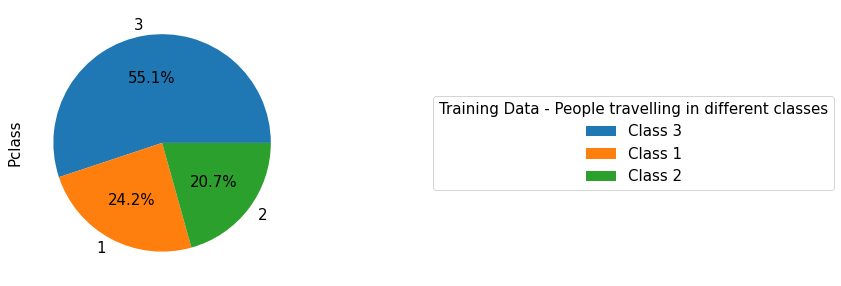

In [87]:
fig_pclass = data.Pclass.value_counts().plot.pie(autopct='%1.1f%%').legend(labels=["Class 3","Class 1","Class 2"], loc='center right', bbox_to_anchor=(3.0, 0.5)).set_title("Training Data - People travelling in different classes")

Text(0.5, 1.0, 'Training Data - Percentage of people survived on the basis of class')

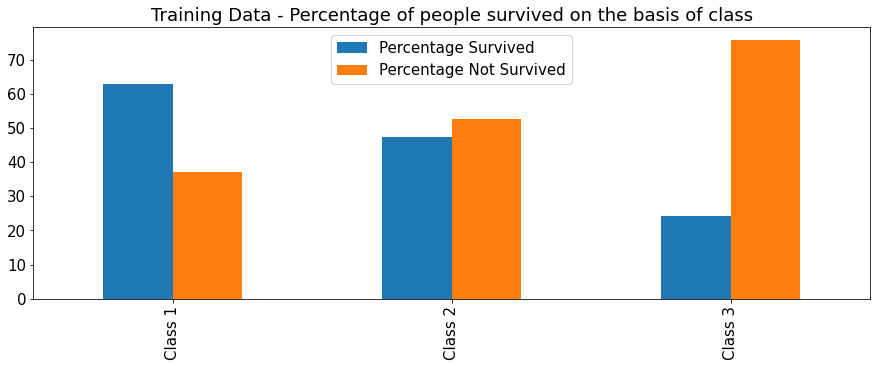

In [88]:
pclass_1_survivor_distribution = round((data[data.Pclass == 1].Survived == 1).value_counts()[1]/len(data[data.Pclass == 1]) * 100, 2)
pclass_2_survivor_distribution = round((data[data.Pclass == 2].Survived == 1).value_counts()[1]/len(data[data.Pclass == 2]) * 100, 2)
pclass_3_survivor_distribution = round((data[data.Pclass == 3].Survived == 1).value_counts()[1]/len(data[data.Pclass == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"Class 1": pclass_1_survivor_distribution,"Class 2": pclass_2_survivor_distribution, "Class 3": pclass_3_survivor_distribution},  
     "Percentage Not Survived":{"Class 1": 100-pclass_1_survivor_distribution,"Class 2": 100-pclass_2_survivor_distribution, "Class 3": 100-pclass_3_survivor_distribution}})
pclass_perc_df.plot.bar().set_title("Training Data - Percentage of people survived on the basis of class")

### Sibs and Parh

* Sibsp - количество братьев и сестер на корабле
* Parch - количество родителей на корабле


Я объединю их в параметр "Family"

На графике видно, что данные по количеству членов семьи на борту разделяются на 3 группы:
1. Человек один
2. Есть от 1 до 3 родственников
3. Более 4 родственников на борту

Поэтому я создам три новые колонки "Family_Alone", "Family_Middle", "Family_Big"

In [89]:
data['Family'] = data.Parch + data.SibSp

In [90]:
data.groupby('Family').size() / len(data)

Family
0     0.602694
1     0.180696
2     0.114478
3     0.032548
4     0.016835
5     0.024691
6     0.013468
7     0.006734
10    0.007856
dtype: float64

PassengerId
3       True
5      False
6      False
7      False
12      True
       ...  
885    False
887    False
888     True
890     True
891    False
Name: Survived, Length: 537, dtype: bool


Text(0.5, 1.0, 'Training Data - Percentage of people survived on the basis of class')

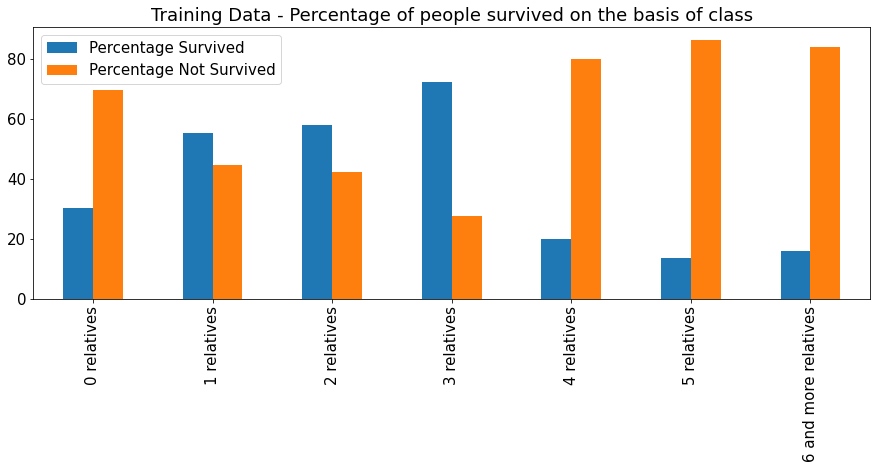

In [91]:
print(data[data.Family == 0].Survived == 1)
relat_0 = round((data[data.Family == 0].Survived == 1).value_counts()[1]/len(data[data.Family == 0]) * 100, 2)
relat_1 = round((data[data.Family == 1].Survived == 1).value_counts()[1]/len(data[data.Family == 1]) * 100, 2)
relat_2 = round((data[data.Family == 2].Survived == 1).value_counts()[1]/len(data[data.Family == 2]) * 100, 2)
relat_3 = round((data[data.Family == 3].Survived == 1).value_counts()[1]/len(data[data.Family == 3]) * 100, 2)
relat_4 = round((data[data.Family == 4].Survived == 1).value_counts()[1]/len(data[data.Family == 4]) * 100, 2)
relat_5 = round((data[data.Family == 5].Survived == 1).value_counts()[1]/len(data[data.Family == 5]) * 100, 2)
relat_6_and_more = round((data[(data.Family >= 6) & (data.Family <= 10)].Survived == 1).value_counts()[1]/len(data[(data.Family >= 6) & (data.Family <= 10)]) * 100, 3)

pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"0 relatives": relat_0,"1 relatives": relat_1, "2 relatives": relat_2, "3 relatives": relat_3,"4 relatives": relat_4, "5 relatives": relat_5, "6 and more relatives": relat_6_and_more},  
     "Percentage Not Survived":{"0 relatives": 100 - relat_0,"1 relatives": 100-relat_1, "2 relatives": 100-relat_2, "3 relatives": 100-relat_3,"4 relatives": 100-relat_4, "5 relatives": 100-relat_5, "6 and more relatives": 100-relat_6_and_more},})
pclass_perc_df.plot.bar().set_title("Training Data - Percentage of people survived on the basis of class")

In [92]:
data['Family_Alone'] = data.Family == 0 
data['Family_Middle'] = (data['Family'] >= 1) & (data['Family'] <= 4 )
data['Family_Big'] = (data['Family'] >= 5) & (data['Family'] <= 10 )

In [93]:
data['Family_Alone'] = data['Family_Alone'].replace([False, True], [0, 1])
data['Family_Middle'] = data['Family_Middle'].replace([False, True], [0, 1])
data['Family_Big'] = data['Family_Big'].replace([False, True], [0, 1])

### Fare

"Fare" - стоимость билета

Я разделила все билеты по их стоимости на 4 группы. По графику видно, что чем выше стоимость, тем выше шанс выжить.

Поэтому я создам 4 отдельные колонки:

"Fare_Low", "Fare_Middle", "Fare_HighMiddle", "Fare_High"

In [94]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

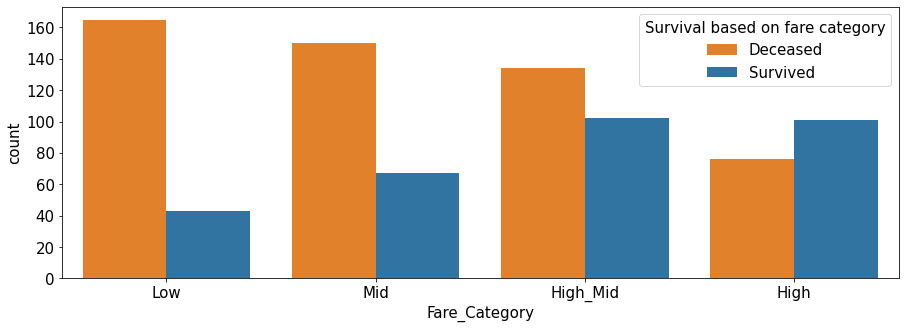

In [95]:
data['Fare_Category'] = pd.cut(data['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])
x = sns.countplot(x = "Fare_Category", hue = "Survived", data = data, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Survival based on fare category")


In [96]:
data['Fare_Low'] = (data['Fare'] >= 0) & (data['Fare'] <= 7.9 )
data['Fare_Middle'] = (data['Fare'] > 7.9) & (data['Fare'] <= 14.45 )
data['Fare_HighMiddle'] = (data['Fare'] > 14.45) & (data['Fare'] <= 31 )
data['Fare_High'] = (data['Fare'] >= 31) & (data['Fare'] <= 513 )

data['Fare_Low'] = data['Fare_Low'].replace([False, True], [0, 1])
data['Fare_Middle'] = data['Fare_Middle'].replace([False, True], [0, 1])
data['Fare_HighMiddle'] = data['Fare_HighMiddle'].replace([False, True], [0, 1])
data['Fare_High'] = data['Fare_High'].replace([False, True], [0, 1])

### Embarked

Embarked - порт, в который отправился пассажир
* C = Cherbourg; Q = Queenstown; S = Southampton

По графику видно, что около 65% тех, кто сел на каорабль в порту Southampton погибли

Шансы выжить, для тех, кто сел в других портах равны примерно 50%

По моему мнению, это данные довольно важные, поэтому я переведу их численные, сделав три столбца:

'Embarked_C', 'Embarked_S', 'Embarked_Q'

Text(0.5, 1.0, 'Training Data - Survival based on embarking point.')

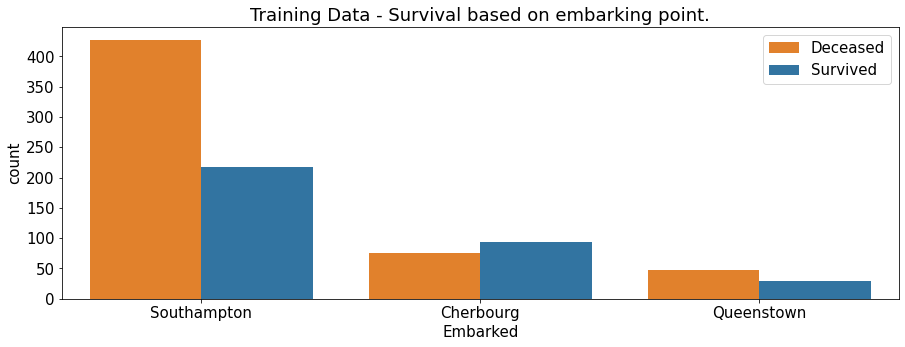

In [97]:
p = sns.countplot(x = "Embarked", hue = "Survived", data = data, palette=["C1", "C0"])
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.legend(labels = ["Deceased", "Survived"])
p.set_title("Training Data - Survival based on embarking point.")

Text(0.5, 1.0, 'Training Data - Percentage of people survived on the embarked port')

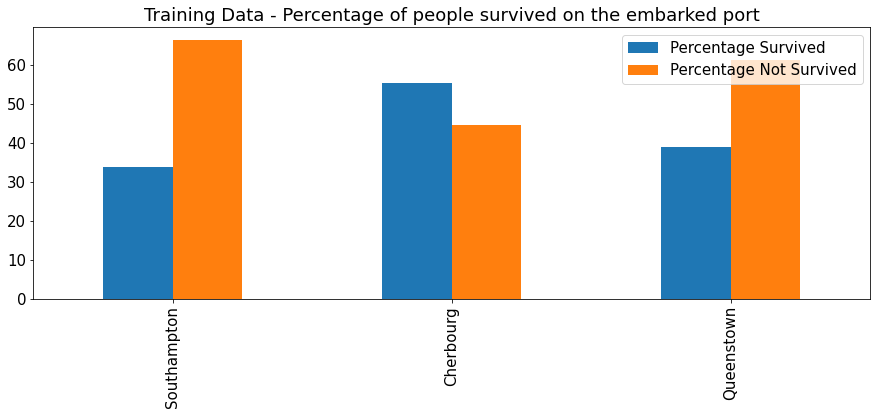

In [98]:
Embarked_S = round((data[data.Embarked == 'S'].Survived == 1).value_counts()[1]/len(data[data.Embarked == 'S']) * 100, 2)
Embarked_C = round((data[data.Embarked == 'C'].Survived == 1).value_counts()[1]/len(data[data.Embarked == 'C']) * 100, 2)
Embarked_Q = round((data[data.Embarked == 'Q'].Survived == 1).value_counts()[1]/len(data[data.Embarked == 'Q']) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"Southampton": Embarked_S,"Cherbourg": Embarked_C, "Queenstown": Embarked_Q},  
     "Percentage Not Survived":{"Southampton": 100 - Embarked_S,"Cherbourg": 100- Embarked_C, "Queenstown": 100- Embarked_Q},})
pclass_perc_df.plot.bar().set_title("Training Data - Percentage of people survived on the embarked port")

In [99]:
data['Embarked_C'] = data.Embarked == 'C'
data['Embarked_S'] = data.Embarked == 'S'
data['Embarked_Q'] = data.Embarked == 'Q'

data['Embarked_C'] = data['Embarked_C'].replace([False, True], [0, 1])
data['Embarked_S'] = data['Embarked_S'].replace([False, True], [0, 1])
data['Embarked_Q'] = data['Embarked_Q'].replace([False, True], [0, 1])

In [100]:
helpful = ['Pclass', 'Sex', 'Age', 'Family_Alone', 'Family_Middle', 'Family_Big', 'Fare_Low', 'Fare_Middle', 'Fare_HighMiddle', 'Fare_High', 'Embarked_C', 'Embarked_S', 'Embarked_Q' ]
list(data)

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Age_Range',
 'Salutation',
 'Family',
 'Family_Alone',
 'Family_Middle',
 'Family_Big',
 'Fare_Category',
 'Fare_Low',
 'Fare_Middle',
 'Fare_HighMiddle',
 'Fare_High',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q']

In [101]:
X = data[helpful]
Y = data['Survived']
data_new = pd.merge(X, Y, how ='inner', on ='PassengerId')
data_new.head()

,Pclass,Sex,Age,Family_Alone,Family_Middle,Family_Big,Fare_Low,Fare_Middle,Fare_HighMiddle,Fare_High,Embarked_C,Embarked_S,Embarked_Q,Survived
PassengerId,,,,,,,,,,,,,,
1,3,0,22.0,0,1,0,1,0,0,0,0,1,0,0
2,1,1,38.0,0,1,0,0,0,0,1,1,0,0,1
3,3,1,26.0,1,0,0,0,1,0,0,0,1,0,1
4,1,1,35.0,0,1,0,0,0,0,1,0,1,0,1
5,3,0,35.0,1,0,0,0,1,0,0,0,1,0,0


### Correlation

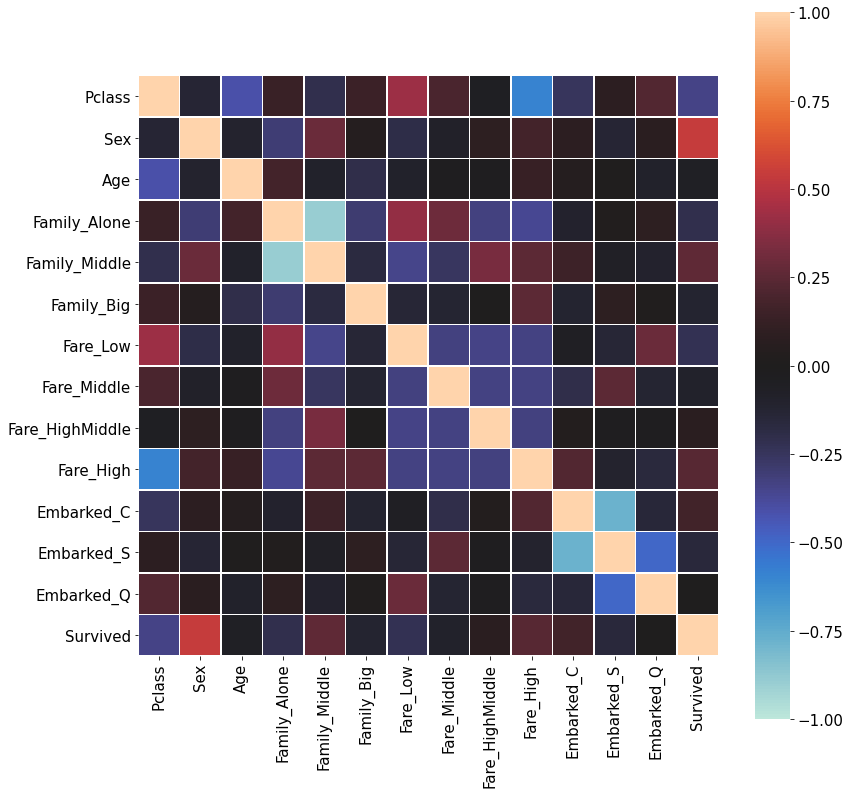

In [102]:
fig, ax = plt.subplots(figsize=(13, 13))
data_correl = data_new.corr()
sns.heatmap(data_correl, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5)
plt.savefig("conf.png")

In [103]:
def convert(array):
    s = set(list(array))
    converted = []
    for x in array:
        tmp = [0] * len(s)
        jt = 0
        for i in s:
            tmp[jt] = int(i == x)
            jt += 1
        converted.append(tmp)
    return converted

In [104]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
Y_prepared = np.array(convert(encoded_Y))

In [105]:
print(Y_prepared)

[[1 0]
 [0 1]
 [0 1]
 ...
 [1 0]
 [0 1]
 [1 0]]


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_prepared, test_size = 0.3, random_state = 9928316)

In [109]:
 
class NeuralNetwork:
    def __init__(self, layers_size):
        self.layers_size = layers_size
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.costs = []
 
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
 
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)
 
    def initialize_parameters(self):
        np.random.seed(1)
 
        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))
 
    def forward(self, X):
        store = {}
 
        A = X.T
        for l in range(self.L - 1):
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            A = self.sigmoid(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z
 
        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.softmax(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z
 
        return A, store
 
    def sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return s * (1 - s)
 
    def backward(self, X, Y, store):
 
        derivatives = {}
 
        store["A0"] = X.T
 
        A = store["A" + str(self.L)]
        dZ = A - Y.T
 
        dW = dZ.dot(store["A" + str(self.L - 1)].T) / self.n
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)
 
        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db
 
        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self.sigmoid_derivative(store["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(store["A" + str(l - 1)].T)
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)
 
            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db
 
        return derivatives
 
    def fit(self, X, Y, learning_rate=0.01, n_iterations=2500):
        np.random.seed(1)
 
        self.n = X.shape[0]
 
        self.layers_size.insert(0, X.shape[1])
 
        self.initialize_parameters()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            cost = -np.mean(Y * np.log(A.T+ 1e-8))
            derivatives = self.backward(X, Y, store)
 
            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives[
                    "db" + str(l)]
 
            if loop % 100 == 0:
                print("Cost: ", cost, "Train Accuracy:", self.predict(X, Y))
 
            if loop % 10 == 0:
                self.costs.append(cost)
 
    def predict(self, X, Y):
        A, cache = self.forward(X)
        #print("Вот",A)
        y_hat = np.argmax(A, axis=0)
        Y = np.argmax(Y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy * 100
    
    def result_mk(self, X):
        A, cache = self.forward(X)
        return A
 
    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()

 

### <center>Training and error plot</center>

Cost:  0.36762038615697973 Train Accuracy: 38.20224719101123
Cost:  0.32057801880986636 Train Accuracy: 63.56340288924559
Cost:  0.30798467356834236 Train Accuracy: 63.7239165329053
Cost:  0.3127942951637132 Train Accuracy: 63.88443017656501
Cost:  0.30400389325195143 Train Accuracy: 65.00802568218299
Cost:  0.297174964537826 Train Accuracy: 69.82343499197432
Cost:  0.2913846302371977 Train Accuracy: 72.87319422150883
Cost:  0.28683968711836766 Train Accuracy: 73.67576243980739
Cost:  0.2831408315366819 Train Accuracy: 74.31781701444623
Cost:  0.2799624228601795 Train Accuracy: 74.63884430176564
Train Accuracy: 71.26805778491172
Test Accuracy: 67.91044776119402


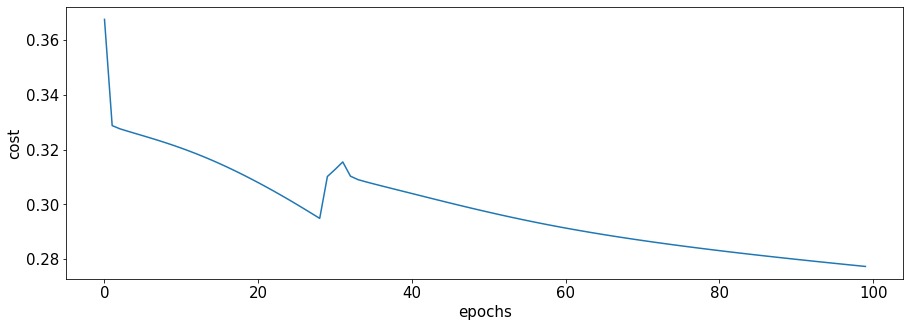

In [110]:
layers_dims = [10, 2]
NN = NeuralNetwork(layers_dims)
NN.fit(X_train, y_train, learning_rate=0.1, n_iterations=1000)
print("Train Accuracy:", NN.predict(X_train, y_train))
print("Test Accuracy:", NN.predict(X_test, y_test))
NN.plot_cost()

In [111]:
res = NN.result_mk(X_test)
def change_form(res):
    y_result = []
    for i in range(res.shape[1]):
        y = []
        for j in range(res.shape[0]):
            if res[j][i] >= 0.5:
                y.append(1)
            else:
                y.append(0) 
        y_result.append(y)
    return y_result

y_result = np.array(change_form(res))

In [112]:

def convert_back(array):
    converted = []
    for x in array:
        for i in range(len(x)):
            if x[i] >= 0.5:
                converted.append(i)
                break
    return converted

Confusion matrix, without normalization
[[99 65]
 [21 83]]


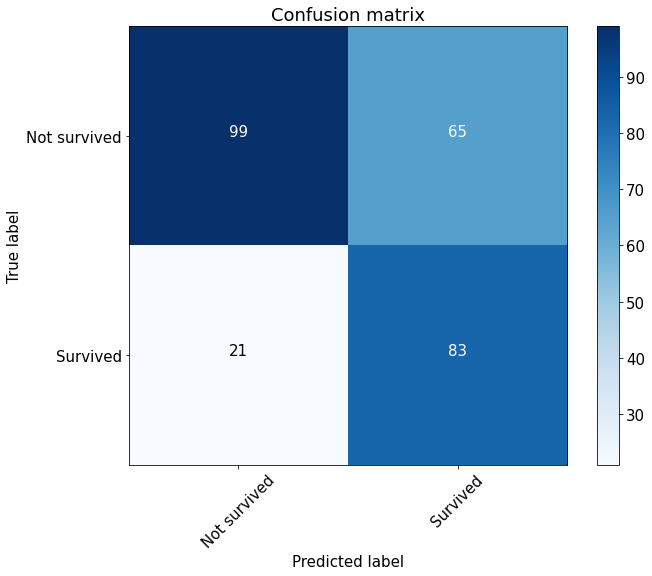

In [113]:
from sklearn.metrics import confusion_matrix
import itertools
# Воспользуемся функцией построения матрицы ошибок из документации sklearn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)
cnf_matrix = confusion_matrix(np.array(convert_back(y_test)), np.array(convert_back(y_result)))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Not survived', 'Survived'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

### <center>Algorithms of machine learning</center>


In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
#print(model.predict(X_test))
predict = model.predict(X_test)

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
#print(model2.predict(X_test))
predict2 = model2.predict(X_test)

model3 = GaussianNB()
model3.fit(X_train, convert_back(y_train))
#print(model2.predict(X_test))
predict3 = model3.predict(X_test)

c:\users\оксана\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### <center>Report on the work of my neural network</center>

In [115]:
from sklearn.metrics import classification_report 
report = classification_report(np.array(convert_back(y_test)), np.array(convert_back(y_result)), target_names=['Not survived', 'Survived'])
print(report)

              precision    recall  f1-score   support

Not survived       0.82      0.60      0.70       164
    Survived       0.56      0.80      0.66       104

    accuracy                           0.68       268
   macro avg       0.69      0.70      0.68       268
weighted avg       0.72      0.68      0.68       268



### <center>Report on the work of DecisionTreeRegressor algorithm</center>

In [116]:
from sklearn.metrics import classification_report 
report = classification_report(np.array(convert_back(y_test)), np.array(convert_back(predict)), target_names=['Not survived', 'Survived'])
print(report)

              precision    recall  f1-score   support

Not survived       0.84      0.84      0.84       164
    Survived       0.74      0.74      0.74       104

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



### <center>Report on the work of RandomForestRegressor algorithm</center>

In [117]:
from sklearn.metrics import classification_report 
report = classification_report(np.array(convert_back(y_test)), np.array(convert_back(predict2)), target_names=['Not survived', 'Survived'])
print(report)

              precision    recall  f1-score   support

Not survived       0.84      0.84      0.84       164
    Survived       0.74      0.74      0.74       104

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



### <center>Report on the work of Naive Baies algorithm</center>

In [118]:
from sklearn.metrics import classification_report 
report = classification_report(np.array(convert_back(y_test)), predict3, target_names=['Not survived', 'Survived'])
print(report)

              precision    recall  f1-score   support

Not survived       0.81      0.71      0.76       164
    Survived       0.62      0.74      0.68       104

    accuracy                           0.72       268
   macro avg       0.72      0.73      0.72       268
weighted avg       0.74      0.72      0.73       268

